In [94]:
import numpy as np
import pandas as pd

In [95]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1636,ham,"No shit, but I wasn't that surprised, so I wen...",NaN,NaN,NaN
1502,ham,Don no da:)whats you plan?,NaN,NaN,NaN
166,spam,URGENT! We are trying to contact you. Last wee...,NaN,NaN,NaN
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
644,ham,Allo! We have braved the buses and taken on th...,NaN,NaN,NaN


## Data Cleaning

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [97]:
# Droping last 3 columns
df.drop(columns=["Unnamed: 2", "Unnamed: 4", "Unnamed: 3"], inplace=True)
df.sample(5)

,v1,v2
3353,ham,R u sure they'll understand that! Wine * good ...
1366,ham,Bbq this sat at mine from 6ish. Ur welcome 2 come
632,ham,Oh that was a forwarded message. I thought you...
4026,ham,"Yes, princess. Are you going to make me moan?"
857,ham,Hai ana tomarrow am coming on morning. &lt;DE...


In [98]:
df.rename(columns={"v1":"target", "v2":"messages"}, inplace=True)
df.sample(5)

,target,messages
2529,ham,Can you just come in for a sec? There's somebo...
2381,ham,Best line said in Love: . \I will wait till th...
1499,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
818,ham,Then why you not responding
1747,ham,I think u have the wrong number.


In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
# Missing values check
df.isnull().sum()

target      0
messages    0
dtype: int64

In [101]:
# check for duplicate values
df.duplicated().sum()

403

In [102]:
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

## EDA

In [103]:
# Analyzing the data
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

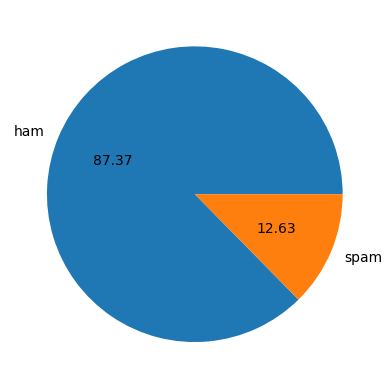

In [104]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [105]:
# Data is imbalanced

In [106]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
df['num_char'] = df['messages'].apply(lambda x: len(str(x)))
df['num_word'] = df['messages'].apply(lambda x: len(word_tokenize(str(x))))
df['num_sent'] = df['messages'].apply(lambda x: len(sent_tokenize(str(x))))

## Data preprocessing
    Lower Case
    Tokenization
    Removing special characters
    stemming

In [108]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string

In [252]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)    

In [253]:
df['transformed_text'] = df['messages'].apply(transform_text)

In [254]:
print(transform_text("Hey let's meet at the mall"))

hey let meet mall


In [255]:
df.head()

,target,messages,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [324]:
df.shape

(5169, 6)

## Model Building

In [363]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [364]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [365]:
y = df['target'].values

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.224, random_state=2, stratify=y)

In [368]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [369]:
mnb = MultinomialNB()

In [370]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9818652849740933
[[1012    0]
 [  21  125]]
1.0


In [371]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [372]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [373]:
msg = "Free entry in 2 a wkly comp to win FA Cup"
transformed = transform_text(msg)
vector = tfidf.transform([transformed]).toarray()
print(model.predict(vector))  # Should give 1 (spam) or 0 (ham)

[1]


In [374]:
test_msg = "Congratulations! You've won a lottery of 100000, call on this mobile number urgently"
print("Predicted:", model.predict(tfidf.transform([transform_text(test_msg)]).toarray()))

Predicted: [1]


In [375]:
df['messages'].str.lower().str.contains('house').sum()

39

In [376]:
from collections import Counter

# 1. Filter spam messages (assuming '1' is spam)
spam_messages = df[df['target'] == 1]

# 2. Combine all transformed spam text
spam_corpus = []
for msg in spam_messages['transformed_text']:
    spam_corpus.extend(msg.split())

# 3. Count frequency
spam_words_freq = Counter(spam_corpus)

# 4. Get top 50
top_50_spam_words = spam_words_freq.most_common(50)

# 5. Print
for word, freq in top_50_spam_words:
    print(f"{word}: {freq}")

call: 320
free: 191
2: 155
txt: 141
text: 122
u: 119
ur: 119
mobil: 114
stop: 104
repli: 103
claim: 98
4: 97
prize: 82
get: 74
new: 64
servic: 64
tone: 63
send: 60
urgent: 57
nokia: 57
contact: 56
award: 55
phone: 52
cash: 51
pleas: 51
week: 49
win: 48
c: 45
collect: 45
min: 45
custom: 42
messag: 42
guarante: 42
per: 41
chat: 38
tri: 37
msg: 35
draw: 35
number: 35
cs: 35
show: 33
today: 33
offer: 33
line: 33
go: 32
receiv: 31
want: 31
latest: 30
rington: 30
landlin: 30
